# Time Series Analysis Mini Project:  Let's explore my steps, and if we are feeling froggy maybe use FB prophet to model...

In [ ]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Acquire!

### Imported steps from my personal Iphone pedometer. 

#### Steps to repeat:
1. Export from Iphone pedometer in settings
2. Save to file
3. Upload using pandas!

In [ ]:
df = pd.read_csv("Export.csv")

In [ ]:
df.head(2)

In [ ]:
df.info()

# Prepare!!

### Initial thoughts:
- This is a really simple data frame
- Only 3 columns to explore in additon to datetime

### Action Items:
- Lets rename some columns in a pythonic manner (h/t Ryan Orsinger)
- Lets set the index as datetime so we can do some time series analysis.

### Personal Notes on Time-Series Analysis
- For the past couple of projects I have been blowing off TSA by moving the target variable from the next time-series row into the current row.  For this mini-project I wanted to do "pure" TSA.
- I also have been anxious to explore FB prophet, so I will be importing and exploring here.


In [ ]:
#rename columns
df = df.rename(columns={'Date':'date',
                  'Steps': 'steps',
                    'Distance': 'distance',
                  'Floors Ascended': 'floors_ascended'})

In [ ]:
# # set index to datetime
df['date'] = pd.to_datetime(df.date)
df = df.sort_values('date').set_index('date')

In [ ]:
df.info()

# Explore!!!

### Questions to explore:
1. What is the relationship between `steps` and `distance`
2. Is there any value to the `floors_ascended` column
3. What day of the week to I walk the most
4. Do I purposefully try to get over my steps ceiling (10,000 steps)
5. How often do I cross my steps ceiling?

In [8]:
df['validate_steps'] = df.steps/ df.distance

In [9]:
df.validate_steps.describe()

count     588.000000
mean     2288.413467
std       142.308722
min      1864.565217
25%      2187.159515
50%      2292.075758
75%      2389.688735
max      2704.000000
Name: validate_steps, dtype: float64

Text(0.5, 1.0, 'Histogram of steps per mile by day')

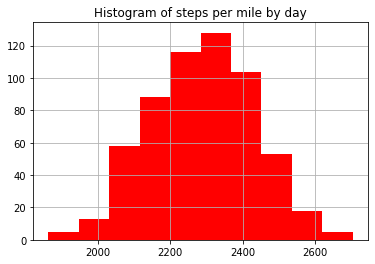

In [10]:
df.validate_steps.hist(color='red')
plt.title("Histogram of steps per mile by day")

**Takeaways**: It looks like there is enough of a variation the steps and distance are not calculated off the same data, which means that both columns have value in exploration. 

    (Unnecessary explanation: if steps and distance had little to no variation then we could assume that they are being calculated by the same measure either gps location or a gyroscopic movement within the phone.  Since they are not, we can examine the relationship between the two features, or use either as a target. 
    
**Next step**:  Prove it statistically

In [11]:
# exploring floors_ascended:
df.floors_ascended.describe()

count    589.000000
mean       1.298812
std        2.159227
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       22.000000
Name: floors_ascended, dtype: float64

Text(0.5, 1.0, 'How many floors do I walk up?')

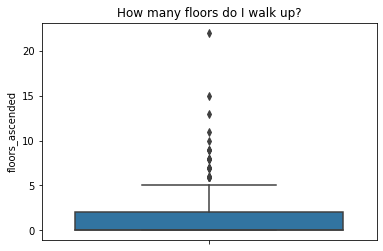

In [12]:
sns.boxplot(y='floors_ascended', data=df)
plt.title('How many floors do I walk up?')

**Takeaways**:  Anecdotal information:  My house is single story.  I don't walk up stairs to go to work.  My neighboorhood is flat.  More than 50% of the days, I do not walk up a flight of stairs.   However, there might be some valuable information in what days are the non-zero days.  Worth taking a look...

In [13]:
print(f'I do not ascend a full set of stairs {round((df.floors_ascended == 0).mean(),4 )*100} percent of the days in this data set')

I do not ascend a full set of stairs 53.31 percent of the days in this data set


In [14]:
# How much do I walk?
df.steps.describe()

count      589.000000
mean      9956.735144
std       5039.222937
min          0.000000
25%       6018.000000
50%      10053.000000
75%      13052.000000
max      25356.000000
Name: steps, dtype: float64

Text(0.5, 1.0, 'Histogram of distribution of steps')

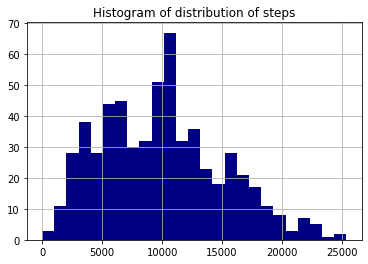

In [15]:
df.steps.hist(bins=25, color='navy')
plt.title('Histogram of distribution of steps')

**Takeaways**: There is a spike right around 10,000 steps which is my daily goal. 

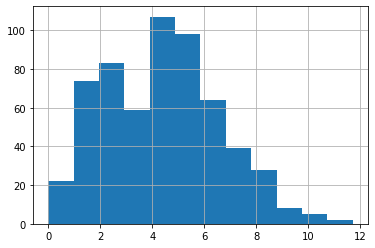

In [16]:
df.distance.hist(bins=12)

### What day of the week do I walk the most steps

In [17]:
df['weekday'] = df.index.day_name()

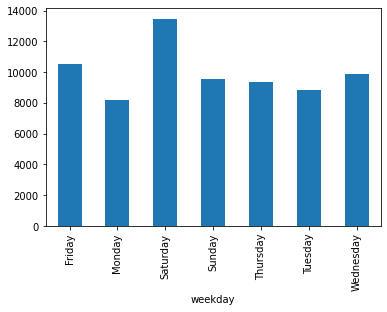

In [18]:
df.groupby('weekday').steps.mean().plot.bar()

Text(0.5, 1.0, 'Average Steps by Month')

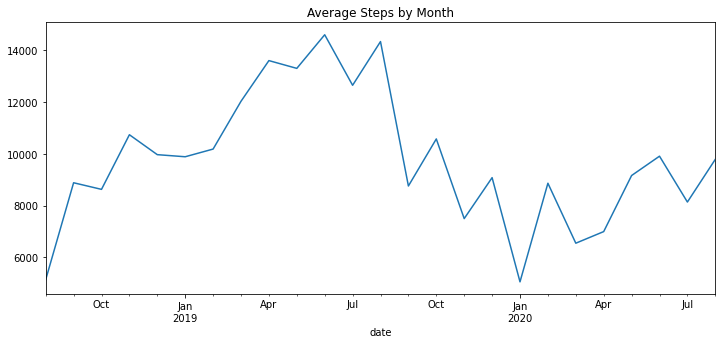

In [36]:
plt.figure(figsize=(12,5))
df.steps.resample("M").mean().plot()
plt.title("Average Steps by Month")

Text(0.5, 1.0, 'Average Steps by Week')

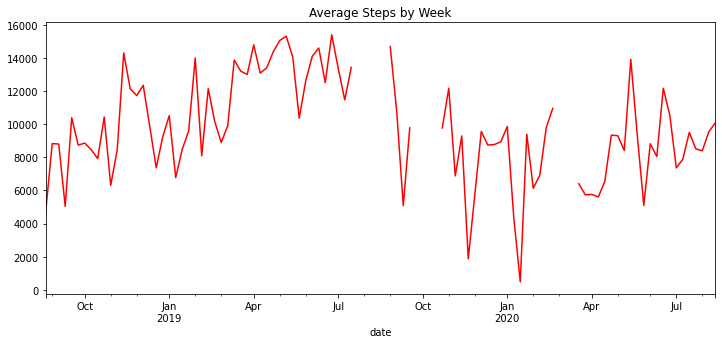

In [35]:
plt.figure(figsize=(12,5))
df.steps.resample("W").mean().plot(color="Red")
plt.title("Average Steps by Week")

### What day of the week do I walk the most?

In [39]:
df.groupby('weekday').steps.describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
Friday,82.0,10545.609756,5257.514156,2184.0,6066.5,10346.0,14757.50,22464.0
Monday,85.0,8182.870588,4262.544877,482.0,4683.0,8159.0,10712.00,19111.0
Saturday,82.0,13461.829268,4995.104798,2128.0,10171.5,12963.0,16964.25,25356.0
Sunday,87.0,9573.045977,4299.389835,1277.0,6480.0,9630.0,11893.50,24639.0
Thursday,83.0,9358.710843,5084.233020,839.0,5075.5,8852.0,12954.50,22507.0
Tuesday,85.0,8834.364706,4950.241620,1479.0,5081.0,8597.0,11872.00,24234.0
Wednesday,85.0,9880.164706,4786.116009,0.0,5965.0,9998.0,13407.00,21305.0
